In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

In [2]:
#Bengaluru Urban
dist = input("Enter District Name")

Enter District Name Bengaluru Rural


In [3]:
df = pd.read_csv('DATA/DISTRICTS/'+dist+'.csv')
# df['Date']=pd.to_datetime(df['Date'])

In [4]:
df

,Date,District Name,Today’s Positives,Total Positives,Today’s Discharges,Total Discharges,Total Active Cases,Today’s Reported Covid Deaths,Total Covid Deaths,Death due to Non- Covid reasons
0,2020-07-01,Bengaluru Rural,29,158,0,14,140,0,4,0
1,2020-07-02,Bengaluru Rural,5,163,32,46,113,0,4,0
2,2020-07-03,Bengaluru Rural,44,207,0,46,156,1,5,0
3,2020-07-04,Bengaluru Rural,11,218,0,46,166,1,6,0
4,2020-07-05,Bengaluru Rural,0,218,0,46,166,0,6,0
...,...,...,...,...,...,...,...,...,...,...
299,2021-05-30,Bengaluru Rural,392,53242,2142,41380,11209,10,653,0
300,2021-05-31,Bengaluru Rural,383,53625,2562,43942,9020,10,663,0
301,2021-06-01,Bengaluru Rural,202,53827,1570,45512,7641,11,674,0
302,2021-06-02,Bengaluru Rural,164,53991,139,45651,7654,12,686,0


<AxesSubplot:>

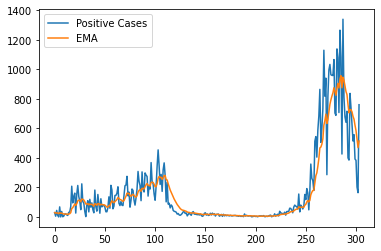

In [5]:
dfts = pd.DataFrame()
dfts["""Positive Cases"""]=df["""Today’s Positives"""]
dfts['Date']=df['Date']
dfts['EMA'] = dfts.iloc[:,0].ewm(span=12,adjust=False).mean()
dfts
title=dist
dfts.plot()

In [6]:
dfts.shape
dfts

,Positive Cases,Date,EMA
0,29,2020-07-01,29.000000
1,5,2020-07-02,25.307692
2,44,2020-07-03,28.183432
3,11,2020-07-04,25.539827
4,0,2020-07-05,21.610623
...,...,...,...
299,392,2021-05-30,620.435626
300,383,2021-05-31,583.907068
301,202,2021-06-01,525.152135
302,164,2021-06-02,469.590268


In [7]:
dfts.head()

,Positive Cases,Date,EMA
0,29,2020-07-01,29.000000
1,5,2020-07-02,25.307692
2,44,2020-07-03,28.183432
3,11,2020-07-04,25.539827
4,0,2020-07-05,21.610623


In [8]:
fig = px.line(dfts, x='Date', y="""Positive Cases""", title=dist+' Positive Cases')
fig.show()

In [9]:
dfts = dfts.assign(Percentage = lambda x: (dfts["""Positive Cases"""] /10960871))

In [25]:
dfts['Percentage'] = dfts['Percentage'].round(decimals=6)

In [82]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts['Percentage'], name='Population Percentage'))

# Edit the layout
fig.update_layout(title='Percentage of Postive cases in ' + dist + ' District',
                   xaxis_title='Date',
                   yaxis_title='Percentage')

fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts["""Positive Cases"""], name='Postive Cases'))
fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts['EMA'], name='Exp Moving Avg'))
#fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts['Percentage'], name='Population Percentage'))

# Edit the layout
fig.update_layout(title='Postive cases in '+dist+' District',
                   xaxis_title='Date',
                   yaxis_title='Count of Cases')

fig.show()

In [51]:
#Bengaluru Urban
dist = input("Enter District Name")

Enter District Name Bengaluru Rural


In [54]:
df = pd.read_excel('DATA/Wave-2 District data/'+dist+' Wave2.xlsx')
# df['Date']=pd.to_datetime(df['Date'])

In [55]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [56]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [57]:
adfuller_test(df["""Today’s Positives"""])

ADF Test Statistic : -1.2212291064499659
p-value : 0.6643974730412526
#Lags Used : 3
Number of Observations Used : 91
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [58]:
# dfts['Difference'] = df["""Today’s Positives"""] - df["""Today’s Positives"""].shift(3)
dfts['Difference'] = df["""Today’s Positives"""].diff()
dfts.head()

,Positive Cases,Date,EMA,Percentage,forecast,Difference
0,29,2020-07-01,29.000000,0.000003,NaN,NaN
1,5,2020-07-02,25.307692,0.000000,NaN,0.0
2,44,2020-07-03,28.183432,0.000004,NaN,3.0
3,11,2020-07-04,25.539827,0.000001,NaN,-2.0
4,0,2020-07-05,21.610623,0.000000,NaN,4.0


<AxesSubplot:>

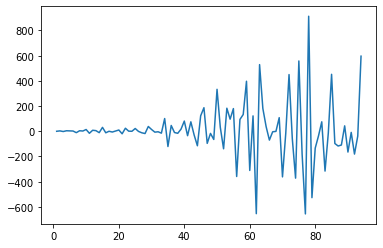

In [59]:
dfts['Difference'].plot()

In [60]:
## Again test dickey fuller test
adfuller_test(dfts['Difference'].dropna())

ADF Test Statistic : -8.97014075292239
p-value : 7.793855676354824e-15
#Lags Used : 2
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [61]:
# dfts['Second Difference'] = df["""Today’s Positives"""] - df["""Today’s Positives"""].shift(2)
# dfts['Second Difference'].plot()
# # Again test dickey fuller test
# adfuller_test(dfts['Second Difference'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

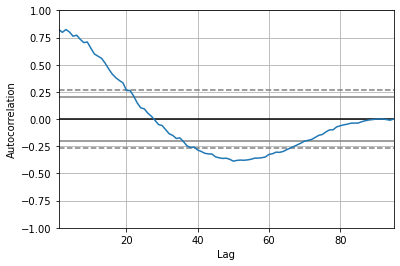

In [64]:
# autocorrelation_plot(dfts['Difference'])
autocorrelation_plot(df["""Today’s Positives"""])
# plt.show()
# plt.savefig('Autocorelation.png')

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



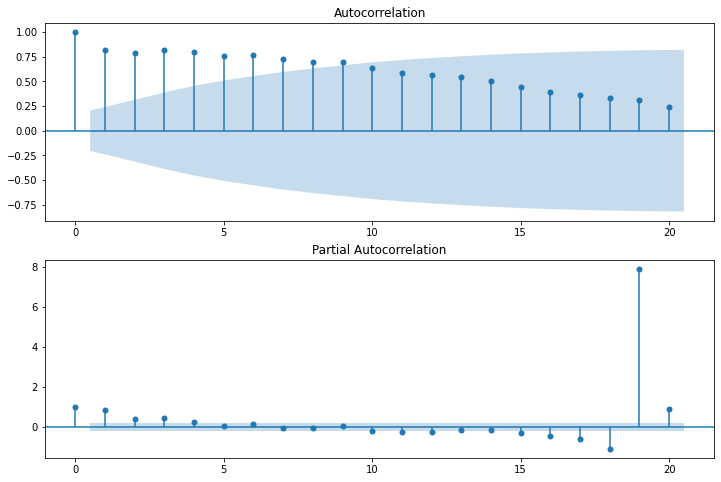

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["""Today’s Positives"""].iloc[3:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["""Today’s Positives"""].iloc[3:],lags=20,ax=ax2)

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
dfts['Second Difference']

0         NaN
1         NaN
2       259.0
3       283.0
4       241.0
        ...  
296   -1002.0
297    -897.0
298   -1316.0
299     103.0
300     115.0
Name: Second Difference, Length: 301, dtype: float64

In [66]:
model=ARIMA(df["""Today’s Positives"""],order=(1,1,1))
model_fit=model.fit()

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

In [67]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Today’s Positives   No. Observations:                   94
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -623.299
Method:                        css-mle   S.D. of innovations            182.843
Date:                 Wed, 09 Jun 2021   AIC                           1254.599
Time:                         20:16:39   BIC                           1264.772
Sample:                              1   HQIC                          1258.708
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.9851      6.481      0.769      0.442      -7.717      17.687
ar.L1.D.Today’s Positives    -0.0660      0.136     -0.486      0.627      -0.332       0.200
ma.L1.D.Today’s Positives    -0.6411      0.085     -7.530      0.000      -0.808      -0.474
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -15.1406           +0.0000j           15.1406            0.5000
MA.1            1.5599           +0.0000j            1.5599            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

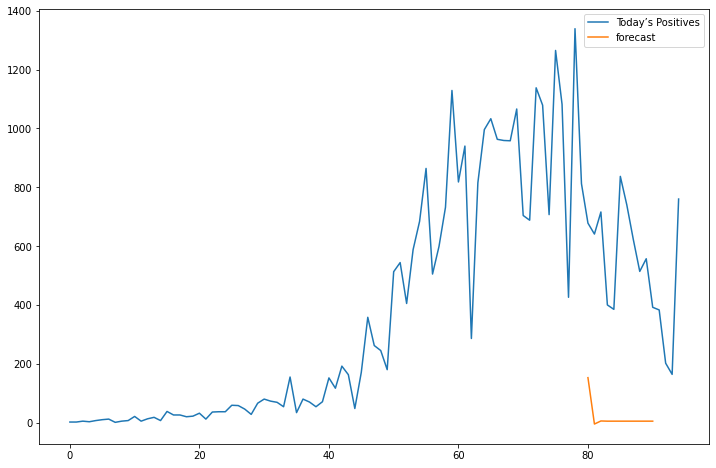

In [71]:
df['forecast']=model_fit.predict(start=80,end=90,dynamic=True)
df[["""Today’s Positives""",'forecast']].plot(figsize=(12,8))

In [78]:
model=sm.tsa.statespace.SARIMAX(df["""Today’s Positives"""],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:>

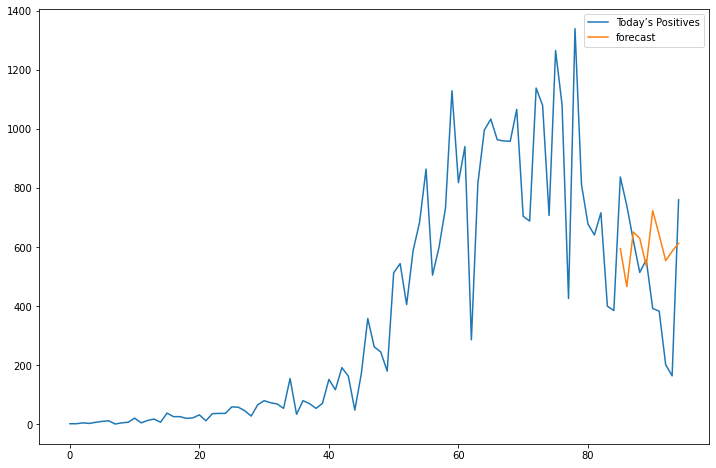

In [81]:
df['forecast']=results.predict(start=85,end=95,dynamic=True)
df[["""Today’s Positives""",'forecast']].plot(figsize=(12,8))

In [76]:
dfts['forecast']=results.predict(start=150,end=320,dynamic=True)
dfts[['Second Difference','forecast']].plot(figsize=(12,8))

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



KeyError: "['Second Difference'] not in index"